# Machine Learning: An important preamble

We are now finally going to have a loo at some of the basic algorithms at the heart of machine learning. 

In practice, most of these machine learning algorithms have already been implemented in Python libraries ( like the **sci-kit learn** library we are going to introduce today ). Deploying them is extremely easy, often requiring just a few lines of code.  

Merely providing a list of commands to execute these algorithms wouldn't be very helpful. This is because there's often a strong temptation to use these methods without fully grasping how they function, treating them like a black box. Instead, we'll adopt an approach that may seem somewhat meticulous, but it's designed to help you truly comprehend your actions. **Your goal should be to develop a deep understanding of the limitations of each algorithm and develop an instinct for when they are appropriate, when they are not, and how they can potentially fail**. This knowledge is crucial for the proper utilization of machine learning.

Regarding this, I encourage you to invest sufficient time in fully understanding the intricate aspects of each algorithm before progressing to the next one. It's essential to remember that **most algorithms will invariably produce some output, but this output can be highly deceptive, in other words, wrong**, particularly when the training data used is fundamentally disconnected from the mathematical model upon which the algorithm is built.

Here's an example that illustrates the point clearly: Imagine you have no knowledge of gravity and Newton's laws of motion. You decide to measure the time $t$ it takes for a ball to fall from different heights $h$. Then, you attempt to fit a linear function, $t = a h + b$, to predict the time for other heights. Your algorithm may indeed find values for the parameters (a, b) that minimize the error when compared to your measured data. However, if you use this linear function for predictions, it will fail completely. This is because the true model describing the data's behavior should have a square root dependence, $t = \sqrt{2h/g}$, where $g$ represents the acceleration due to gravity. In fact, your algorithm may even yield a non-zero value for 'b,' implying a falling time when there's no motion at all! This example underscores how an algorithm can lead to inaccurate results when the underlying mathematical model is not properly understood.

================================================================================================

Our approach to introducing various algorithms will follow this general structure:

- We will start by presenting the mathematical foundation of each algorithm. Please note that our explanations will be concise and somewhat simplified. You can find more comprehensive details by following the provided external hyperlinks.


- Next, we will walk you through the implementation of the algorithm, often with some simplifications. In essence, we will outline the steps involved as if we were writing the code ourselves.


- Finally, we will demonstrate how to access the general and computationally efficient version of the algorithm from the sci-kit learn library. We will also provide the syntax for easy deployment in your specific application. This will allow you to quickly integrate the algorithm into your work.

# Regression

We kick off this lecture presenting a family of machine learning techniques for [regression](https://en.wikipedia.org/wiki/Regression_analysis#:~:text=In%20statistical%20modeling%2C%20regression%20analysis,'%2C%20or%20'features'). 

Regression is the collective term for **algorithms designed to predict the relationship between an independent variable $x$ and a dependent variable $y$ when the function connecting them is continuous**. It's worth noting that $x$ and $y$ can be vectors (arrays), not just single variables.

To perform regression, we require a set of $(x, y)$ data points. In other words, we need someone to provide us with the corresponding $y$ values for a range of $x$ values, typically obtained through some sort of measurement. **The need for data whose value is externally provided is why regression is termed a [supervised learning](https://www.ibm.com/topics/supervised-learning#:~:text=the%20next%20step-,What%20is%20supervised%20learning%3F,data%20or%20predict%20outcomes%20accurately.) task**, as it relies on properly labeled training data. This requirement is in contrast to [**unsupervised learning**](https://www.ibm.com/topics/unsupervised-learning#:~:text=Unsupervised%20learning%2C%20also%20known%20as,the%20need%20for%20human%20intervention.) techniques like clustering, which work with unlabeled data. We will not cover any unsupervised learning technique in this course.

While it's impossible to cover all forms of regression analysis in a single lecture, we will present three of the main types, gradually increasing in complexity:

- [Linear Regression](https://www.youtube.com/watch?v=eYTumjgE2IY), also called [multiple regression](https://www.youtube.com/watch?v=K_EH2abOp00) when involving more than one indepepdent variable. 
- Regularization in the form of [Ridge](https://www.youtube.com/watch?v=Q81RR3yKn30), [Lasso](https://www.youtube.com/watch?v=NGf0voTMlcs) and ElasticNet regression.
- [Regression Trees / Random Forest Regression](https://www.youtube.com/watch?v=g9c66TUylZ4)

The lecture's concluding section will delve into the concept of ***metrics*, which are tools used to assess the performance and effectiveness of a machine learning algorithm**.

# Linear Regression

Linear Regression is possibly the most basic form of statistical fitting that falls into the realms of Machine Learning. In practice, the idea of linear regression is to **find the straight line that better fit a set of data.**

> **Think**: can such a model be applied to data that are described by some non-monotonic function? Can you make examples of when such a model is bound to fail miserably? 

Simple linear regression is done by minimising the total error of the model $\hat{y}= a x + b$ (see more later) with respect to its parameters $(a,b)$. 

Linear regression is a very simple and primitive form of Machine Learning, but a good starting point to begin the introduction to basic Machine Learning principles (as well as to demistify it a little bit: Machine Learning can in fact be, at least sometimes, extremely simple!).

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import  Axes3D
from matplotlib import cm

from typing import Tuple

**The problem:**  

We assume that the relation between the independent variable $x$ and the dependent variable $y$ is given by:
    $y =  \beta_1 x + \beta_0 $
    
and we want to find the best values of the coefficients $\beta_1$ and $\beta_0$, that is, those that minimise the error $E$, given by:<br>
$E=\sum_{i=1},N ( \hat{y} - y_i )^2$

Note that we distinguish the **predicted values of $y$**, which we call $\hat{y_i}$, from the $N$ values observed in our training datasets, $y_i$ (where $i=1,N$). 


A full derivation for the coefficients of the least squares algorithm usually involves simple calculus and you can do it yourself. A somewhat different approach which only uses algebra can be found [here](https://www.amherst.edu/system/files/media/1287/SLR_Leastsquares.pdf). To speed up the process of generating the code, we can provide the equations here:

\begin{align}
\beta_1 &= \frac{\sum_{i=1}^{n}(X_i - \langle X \rangle)(Y_i - \langle Y \rangle)}{\sum_{i=1}^{n}(X_i - \langle X \rangle)^2}\\
\beta_0 &= \langle Y \rangle - \beta_1\langle X \rangle
\end{align}

where the $\langle Z \rangle$ means the expected value  (i.e. the mean) of variable $Z$, as measured from the available values in the training dataset. We also remind you that we use the symbol $X$ for the input data (the independent variable) and $Y$ for the output data.

The function below `linear_regression` takes a 1D input array, and returns the two coefficients in a 1D linear regression problem. To help interpret the code, here is a table indicating how different parts of the code represent the equation above.

|`code`|expression|
|----|----|
|`x_mean`|$$\bar{X}$$|
|`y_mean`|$$\bar{Y}$$|
|`x_diff`|$$\sum_{i=1}^n(X_i-\bar{X})$$|
|`y_diff`|$$\sum_{i=1}^n(Y_i-\bar{Y})$$|
|`x_diff_sq`|$$\sum_{i=1}^n(X_i-\bar{X})^2$$|

> In reading the implementation into Python code of linear regression, provided down here, we are using the `np.ndarray` class. Hence, we do not have to manually loop over all values since this is done implicitly!

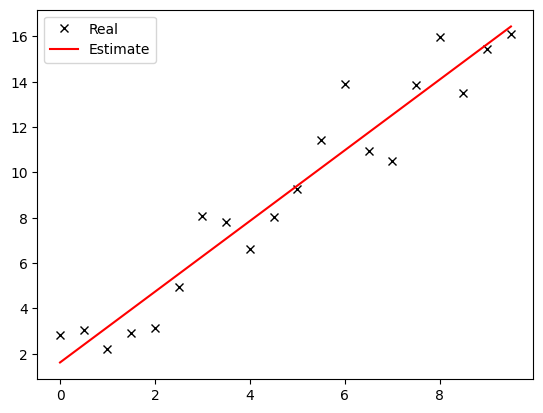

In [6]:
def linear_regression(x: np.ndarray, y: np.ndarray) -> Tuple[float, float]:
    """Returns the least squares coefficient for 2D data
    """
    
    # expected values of X and Y
    x_mean = x.mean() 
    y_mean = y.mean()
    
    # parts within the brackets
    x_diff = x - x_mean 
    y_diff = y - y_mean
    x_diff_sq = x_diff ** 2
    
    # input bracketed values into equations
    b_1 = sum(x_diff * y_diff) / sum(x_diff_sq)
    b_0 = y_mean - b_1 * x_mean
    
    return b_0, b_1

# generate test x and y data
x = np.arange(0, 10, 0.5)
y = np.array(
    [1.5 * i + 5.0 * np.random.random() ** 2 for i in x]
)

# calculate coefficients
b_0, b_1 = linear_regression(x, y)
y_est = np.array([b_0 + b_1 * i for i in x])

# plot
fig, ax = plt.subplots()
ax.plot(x, y, 'kx', label='Real')
ax.plot(x, y_est, 'r-', label='Estimate')
ax.legend()
None

## Multiple Linear Regression

At this point we introduce the Python package `scikit-learn`, which includes a wealth of different machine learning tools covering the following areas:

- Data Preprocessing
- Regression
- Classification
- Clustering
- Dimensionality Reduction
- Model Selection
- ...

> Note that `scikit-learn` does not cover (deep) neural networks and the two preferred packages for neural networks are TensorFlow and PyTorch. Neural networks will not be covered in these lectures but form an important part of Machine Learning.

In this section we will use the Linear Regression functionality to demonstrate how to use `scikit-learn` for **[Multiple Linear Regression](https://www.youtube.com/watch?v=K_EH2abOp00)**.

In multiple linear regression, we still assume that the relation between the dependent (here, let's call it $z$) and independent variable ($v$) is linear. However, there can be multiple independent variables (hence the name). Using vector notations, we can simply write:  

$z = {\bf v}\cdot {\bf \beta_1} + \beta_0$,

where now ${\bf v}$ and ${\bf \beta_1}$ are vectors, whereas $z$ and $\beta_0$ scalars. 

Let us make an explicit example with a 2D vector. In this case, we simply call the 2 independent variables (components of the vector ${\bf v}$) $x$ and $y$ (in other words, ${\bf v}=(x,y)$), and the dependent variable $z$. Using a somewhat longer notation, we could write:

$z = \beta_1 x + \beta_2 y + \beta_0$,

which you should be able to **identify as the equation for a plane**. This geometrical interpretation is pretty useful because it provides some very useful hints about why some pathological cases can arise (and thus a better understanding about how to deal with them!).

In summarise: in 2D multiple regression can be seen as the plane that best fits the available data. In even higher dimensions, we talk instead of the best-fitting **hyper-plane**, but the general underlying description is exactly the same.

The example below shows how data can be fit using a multiple linear regression model using the `scikit-learn` library with a few lines of code.

### Generating the data

We use a 2-column array (`X`), where each column has a coefficient stored in `coeffs`. The y-intercept value is stored in the variable `c`. To generate the output data (`y`), we use the following expression:

|`code`|equation|
|:---:|:---:|
|`y = X.dot(coeffs) + c`|$$y=bX + c$$|

### Creating the regressor object

`scikit-learn` uses a common framework for fitting data and that is as follows:

|Task|`code`|
|:---:|:---:|
|Import model|  `from sklearn.linear_model import LinearRegression`|
|Create the object | `regressor = LinearRegression()`|
|Fit to data |`regressor.fit(X, y)`|

> The `scikit-learn` [API](https://www.mulesoft.com/resources/api/what-is-an-api#:~:text=API%20is%20the%20acronym%20for,you're%20using%20an%20API.) uses this form of calling the code for all of its machine learning objects so it is important to remember this part of the lecture

### Using the regressor object

The regressor object can then be used in a multitude of different ways. In the example below we use `regressor.coef_` and `regressor.intercept_` to get the so-called *gradient parameters* (i.e $\hat{\beta}_{1..N}$) and the *y-intercept* (i.e. $\beta_0$). The name *y-intercept* is a bit of an abused notation, which simply recalls the fact that for linear regression in 1D it is the intercept of the fitting line.

### Plotting the (hyper)plane

In 3D, it is still possible to visualise the results of the fitting (but not in higher dimensions, or at least not so easily). We show here how visualise the representation of the fitting, by creating a square array using the `np.meshgrid` function, and then using the following code snippet to make the output data, and plot it to the already created axis.

```python
zz = predicted_coeffs[0] * xx + predicted_coeffs[1] * yy + predicted_intercept
ax.plot_surface(xx, yy, zz, alpha=0.5, rstride=1, cstride=1, cmap=cm.coolwarm, zorder=0)
```

Coefficients: [0.5 1.2]
Intercepts: 5.00


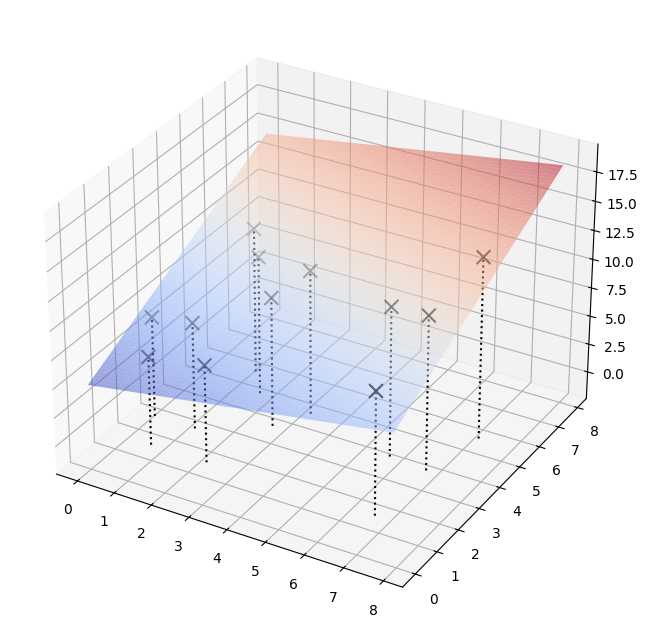

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# generate data
X = np.array([
    [1.0, 1.0],
    [1.4, 5.0],
    [2.5, 1.0],
    [3.0, 3.1],
    [6.9, 1.0],
    [7.4, 5.0],
    [3.5, 4.0],
    [7.0, 3.2],
    [2.0, 4.2],
    [0.4, 2.1],
    [1.5, 2.1],
    [6.0, 3.3],
])
coeffs = np.array([0.5, 1.2])
c = 5.0

# use array_1.dot(array_2) to do matrix multiplication
y = X.dot(coeffs) + c


# Create LinearRegression Class
regressor = LinearRegression().fit(X, y)

# Print data from the fitting
print(f'Coefficients: {regressor.coef_}')
print(f'Intercepts: {regressor.intercept_:.2f}')

# plot real data
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

# plot points
ax.scatter(*X.T, y, c='k', marker='x', s=100, zorder=2)

# plot dotted lines from floor
for i, row in enumerate(X):
    ax.plot([row[0], row[0]], [row[1], row[1]], [-1, y[i]], 'k:', zorder=2)

# plot hyperplane using measured parameters
predicted_coeffs = regressor.coef_
predicted_intercept = regressor.intercept_
xx, yy = np.meshgrid(np.arange(0, 8, 0.1), np.arange(0, 8, 0.1))
zz = predicted_coeffs[0] * xx + predicted_coeffs[1] * yy + predicted_intercept
ax.plot_surface(xx, yy, zz, alpha=0.5, rstride=1, cstride=1, cmap=cm.coolwarm, zorder=0)


None

## An Example - Fish

We have gone to the liberty of finding and preprocessing some real data to use in these examples. 

The first dataset, to be used with Lecture 4 - Regression, is a dataset regarding fish. In this section we will demonstrate how to use the `LinearRegression` class and plot the results.

In [8]:
data = pd.read_csv('data/400-fish-preprocessed.csv')
data = data.sample(frac=1).reset_index(drop=True)
print(data)

FileNotFoundError: [Errno 2] No such file or directory: 'data/400-fish-preprocessed.csv'

We are going to use the column called `'Weight'` as the output variable (the one we are trying to estimate), and this will be allocated to `y`, the rest of the columns will be allocated to an array, `X` using the `pd.DataFrame.to_numpy` method.

In [5]:
# separate input and output column names
columns = list(data.columns)
y_col = columns.pop(0)
print(f'Output Column Name: {y_col}\n')
print(f'Input Column Name List:\n{pd.Series(columns)}\n') # use pd.Series for readability

# split column in X, y which are the input and output variables respectively
y = data[y_col].to_numpy()
X = data[columns].to_numpy()

# show data
print(f'y:\n{y}\n')
print(f'X:\n{pd.DataFrame(X)}\n') # use DataFrame to improve readability

Output Column Name: Weight

Input Column Name List:
0       Length1
1       Length2
2       Length3
3        Height
4         Width
5         Bream
6          Pike
7         Smelt
8        Parkki
9         Perch
10    Whitefish
11        Roach
dtype: object

y:
[ 0.16110916  0.32313014 -1.08505571  3.21716018 -1.08477636  1.40140774
 -0.35847539 -0.77749518 -0.86129914  0.8818232   1.54108101  0.39576024
 -0.74956053 -0.72162587 -0.77749518 -0.50373558  0.81478003 -1.11271101
  1.68075427 -0.43669241  1.40140774 -0.87526646 -0.38641004  0.08847906
  1.23379983 -0.89482072 -0.6629631  -0.02325955  1.68075427  0.39576024
 -0.63782191 -0.77749518 -0.74956053 -1.07527858 -0.37244271  0.14434837
 -0.55401796 -0.70765855  1.72265625  0.59130281 -0.87526646 -0.48418132
  1.9601008   1.45727705 -1.0009724  -0.70765855 -0.69369122 -0.55401796
  0.28402163 -0.58753954 -0.77749518  0.89858399 -0.66575657 -0.35009499
  0.4711838  -1.08533505 -0.16293282 -0.21880212 -0.95907042 -0.27467143
  0.4935


## Training a model: Splitting data into a *training* and *test* set

When actually doing Machine Learning, it is necessary to break up a large dataset into (at least ) two chunks to show that your model is really working. This operation is known as **splitting the data into a training set and testing set**. 

**A general rule of thumb is to put 80% of your available data in your training set and 20% in your test set**. However, like many rule of thumbs these are just very empirical rules, without much justification apart from the fact they seem to work in most cases. In fact, for large models with a lot of parameters but an even larger amount of data, splitting like 99%-1% or even more extreme can be used. In practice, you need to experiment a bit and have a look at the model performance in terms of bias and variance. 


### Why the splitting?

The training set is used to decide the best parameters for the model, and the test set is used to give the fitted model data that has never seen before to check whether or not it is able to predict values accurately. 

If a model does very well on the training set but it has a bad performance over the test set, we will typically say the **model is overfitting and has high variance**. In this case, we should shift more of the data to the training set - or the number of parameters in the model reduced. At the same time, if the model **cannot even well predict the training set, it is said to have a high bias**, in other words, the model makes the wrong assumptions about how the data behave, often meaning it is too simple and the model must be changed. 

Thus, in practice, **splitting the data into different sets allows us to understand these two separate aspects, variance and bias**. The goal is to always minimise both of them as much as possible, although one must be careful because a trade-off always exists between the two. 

Understanding bias vs variance is quite important and because different learners have different ways to understand the same subjects, we will leave a short list of articles on errors in ML models, bias, variance and their tradeoff here. We will list them somewhat in order of difficulty in terms of the math involved:

- [This page](https://www.kdnuggets.com/2021/04/imerit2-bias-variance-unpredictability.html) uses (almost) no math and a qualitative but intuitive approach. 
- [This article](https://www.kdnuggets.com/2021/08/visualizing-bias-variance.html) is for those preferring a more visual explanation and / or real-life metaphors.
- Check [here](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229) for those who like to see the math written down explicitely but without exaggerating.
- [This page](https://dmol.pub/ml/regression.html) (taken from a ML course specific for molecular prediction), in particular section 3.4 onwards, is for those who wants to go **deeper into the hard mathematical details**.

> You will see in this implementation that we are also starting to see a **score function**, which is used to determine how well the data is fitted. More about this later in the last section of the lecture.


<img src="https://miro.medium.com/max/2272/1*-8_kogvwmL1H6ooN1A1tsQ.png" alt="train-test-split" style="width: 50%;"/>

In [16]:
# Split the data into Training and Test Set
training_fraction = 0.8 # we will use 50% of the total data to train the model (this is arbitrarily chosen for now)
training_size = int(training_fraction * len(X))

X_train = X[:training_size]
X_test = X[training_size:]
y_train = y[:training_size]
y_test = y[training_size:]

print(f'Training Data:\n{pd.DataFrame(X_train)}\n\n{pd.Series(y_train)}\n')
print(f'Test Data:\n{pd.DataFrame(X_test)}\n\n{pd.DataFrame(y_test)}\n')

# Use the LinearRegression class as before 
regressor = LinearRegression().fit(X_train, y_train)
print(f'Score: {regressor.score(X_test, y_test)}')
print(f'Intercepts: {regressor.intercept_}')
print(f'Coefficients: {pd.Series(regressor.coef_)}')

# use LinearRegression.predict to create some predicted values
y_pred = regressor.predict(X_test)

Training Data:
     0    1
0  1.0  1.0
1  1.4  5.0
2  2.5  1.0
3  3.0  3.1
4  6.9  1.0
5  7.4  5.0
6  3.5  4.0
7  7.0  3.2
8  2.0  4.2

0     6.70
1    11.70
2     7.45
3    10.22
4     9.65
5    14.70
6    11.55
7    12.34
8    11.04
dtype: float64

Test Data:
     0    1
0  0.4  2.1
1  1.5  2.1
2  6.0  3.3

       0
0   7.72
1   8.27
2  11.96

Score: 1.0
Intercepts: 5.0
Coefficients: 0    0.5
1    1.2
dtype: float64


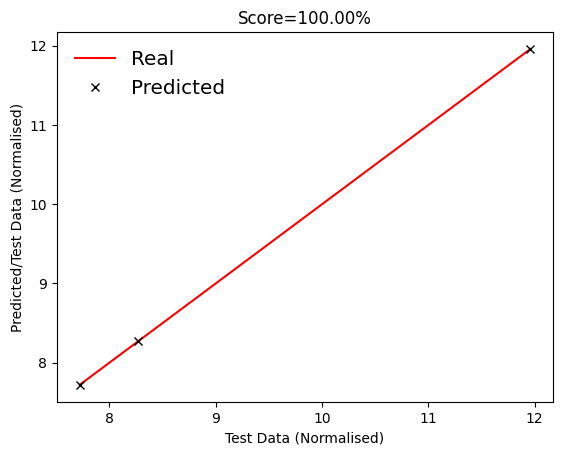

In [17]:
fig, ax = plt.subplots()
ax.plot(y_test, y_test, 'r-', label='Real')
ax.plot(y_test, y_pred, 'kx', label='Predicted')
ax.set_xlabel('Test Data (Normalised)')
ax.set_ylabel('Predicted/Test Data (Normalised)')
ax.legend(frameon=False, fontsize='x-large')
ax.set_title(f'Score={regressor.score(X_test, y_test) * 100 :.2f}%')
None

> **Food for thoughts**: You should ask yourself, what happens if the real function approximating the underlying data is **not linear**? For example, what could we do if we suspected the underlying data is better described by the form: $y = \sum_{i=0}^N a_i f_i( x )$, where $f_i$ is not a linear (but still known!) function? 

>Would it really be that different, or would we be able to use multiple linear regression (by being moderately smart)? When would instead this type of regression fail completely?

## Summary

In this section we have introduced the concept of linear regression both in terms of the theory and a manual implementation of univariate regression, but also through the more relevant multivariate linear regression using `scikit-learn`. We have also covered an introduction to conducting a train-test split and using the `LinearRegression` class in `scikit-learn` to compared values predicted by the model (`y_pred`) against the real values (`y_test`). In the last part of this set of notes, we will cover caveats on how to conduct the train-test split as well as a more detailed explanation what is meant by the `score` of a model. Before we touch upon this aspect again, however, let us have a look at other types of regression models.